<a href="https://colab.research.google.com/github/sakshijain1234/IMDB-web-scrapping/blob/main/numberplate_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [3]:
!pip install easyocr
!pip instll imutils
!pip install opencv-python-headless==4.1.2.30
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.2/608.2 KB 47.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


ERROR: unknown command "instll" - maybe you meant "install"
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv-python-headless==4.1.2.30 (from versions: 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.14.53, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.2.54, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72)
ERROR: No matching distribution found for opencv-python-headless==4.1.2.30
Looking in indexes: https://download.pytorch.org/whl/cu118, https://us-python.pkg.dev/colab-wheels/public/simple/


importing libraries

In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

**preprocessing**
:convert colored image into grayscale format

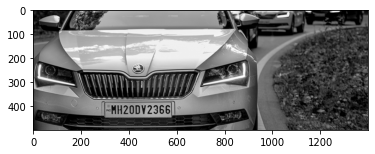

In [13]:
img=cv2.imread('/content/CAR_IMG_3.jpg')
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

apply filter and edge detection

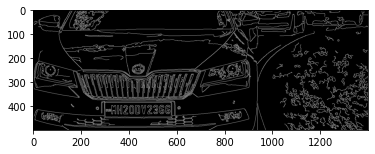

In [14]:
bfilter= cv2.bilateralFilter(gray, 11,17,17) #noise detection
edged= cv2.Canny(bfilter,30,200) #edge detction
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

FIND CONTOURS AND APPLY MASK

In [15]:
keypoints=cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours= imutils.grab_contours(keypoints)
contours= sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [16]:
location= None
for contour in contours:
  approx= cv2.approxPolyDP(contour,10,True)
  if len(approx) == 4:
    location = approx
    break

In [18]:
location

array([[[300, 387]],

       [[303, 445]],

       [[577, 443]],

       [[574, 384]]], dtype=int32)

In [19]:
mask= np.zeros(gray.shape, np.uint8)
new_image= cv2.drawContours(mask, [location],0,255,-1)
new_image= cv2.bitwise_and(img, img, mask=mask)

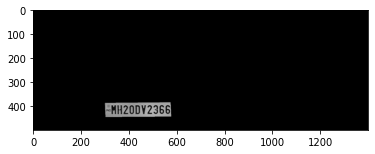

In [20]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [21]:
(x,y)= np.where(mask==255)
(x1,y1)= (np.min(x), np.min(y))
(x2,y2)= (np.max(x), np.max(y))
cropped_image= gray[x1:x2+1, y1:y2+1]

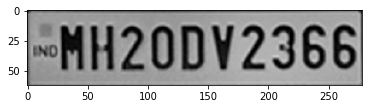

In [22]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

use easy ocr to read text

In [23]:
reader= easyocr.Reader(['en'])
result= reader.readtext(cropped_image)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[3, 27], [27, 27], [27, 41], [3, 41]], '[4o', 0.07458649779593057),
 ([[18, 2], [278, 2], [278, 57], [18, 57]],
  "'NHZODV2366",
  0.25769721022145986)]

plot the result

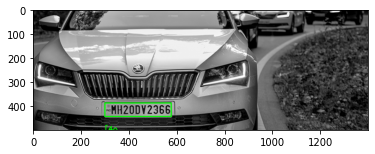

In [26]:
text= result[0][-2]
font= cv2.FONT_HERSHEY_SIMPLEX
res= cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0),thickness=2,lineType=cv2.LINE_AA, bottomLeftOrigin=False)
res= cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]),(0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))